Введите количество слагаемых для разложения: 100
[0.7401738843949671, 11.734861829941968, 41.4388078475709, 90.80821420921524, 159.90328897383202, 248.7334266025962, 357.30110217720096, 485.60718804044706, 633.6520540679044, 801.4358785466248, 988.9587559245391, 1196.220739999924, 1423.221863231295, 1669.9621461398021, 1936.4416022126434, 2222.66024060875, 2528.6180677240995, 2854.3150881344745, 3199.7513051832966, 3564.926721359381, 3949.8413385462245, 4354.495158190407, 4778.888181417793, 5223.020409115202, 5686.891841988817, 6170.502480606601, 6673.852325429524, 7196.941376834875, 7739.769635133843, 8302.337100584937, 8884.643773404348, 9486.68965377398, 10108.474741847787, 10749.999037756768, 11411.262541612952, 12092.265253512605, 12793.007173538821, 13513.488301763608, 14253.708638249653, 15013.668183046764, 15793.366936213262, 16592.80489778591, 17411.982067801953, 18250.898446294388, 19109.554033292465, 19987.948828822264, 20886.082832907032, 21803.956045567575, 22741.568466822

<ipython-input-2-baddb711445b>:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  denominator, _ = quad(integrand_g, 0, 1)


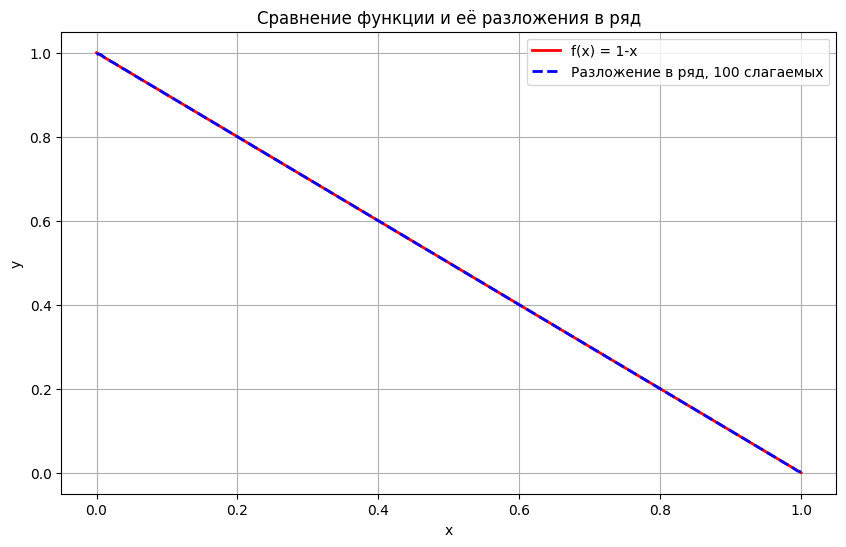

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad

# Функция для поиска решений уравнения tg(sqrt(λ)) = 1/sqrt(λ)
def find_eigenvalues(n_max):
    def equation(lambda_n):
        return np.sqrt(lambda_n)*np.sin(np.sqrt(lambda_n)) - np.cos(np.sqrt(lambda_n))


    # Используем fsolve для нахождения корней уравнения в интервале
    lambdas = []
    for n in range(0, n_max + 1):
        # Предполагаем начальное приближение для корня (fsolve находит корень для текущего собственного значения λ, используя начальное приближение. Корень добавляется в lambdas.)
        lambda_approx = (n * np.pi)**2
        lambda_n = fsolve(equation, lambda_approx)[0]
        lambdas.append(lambda_n)
    print(lambdas)

    return lambdas

# Функция для расчета коэффициента An
def calculate_an(n, lambda_n):
    def integrand_f(x):
        return (1 - x) * (np.sin(np.sqrt(lambda_n)*x) + np.sqrt(lambda_n)*np.cos(np.sqrt(lambda_n)*x))

    def integrand_g(x):
        return (np.sin(np.sqrt(lambda_n)*x) + np.sqrt(lambda_n)*np.cos(np.sqrt(lambda_n)*x))**2

    numerator, _ = quad(integrand_f, 0, 1)
    denominator, _ = quad(integrand_g, 0, 1)

    return numerator / denominator

# Функция для построения разложения
def series_expansion(x, n_terms, lambdas):
    series_sum = 0
    for n in range(n_terms):
        lambda_n = lambdas[n]
        A_n = calculate_an(n + 1, lambda_n)
        y_n = A_n * (np.sin(np.sqrt(lambda_n)*x) + np.sqrt(lambda_n)*np.cos(np.sqrt(lambda_n)*x))
        series_sum += y_n
        # print(series_sum)
        # print(lambda_n)
    return series_sum

# Основная функция для визуализации
def visualize(n_terms):
    # Находим собственные значения λ
    lambdas = find_eigenvalues(n_terms)

    # Создаем массивы для x и y
    x_values = np.linspace(0, 1, 400) #Создает массив из 400 равномерно распределённых точек между 0 и 1. Эти точки используются для построения графиков функции и её аппроксимации.
    original_function = 1 - x_values
    approximation = series_expansion(x_values, n_terms, lambdas)

    # Построение графиков
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, original_function, label='f(x) = 1-x', color='red', linewidth=2)
    plt.plot(x_values, approximation, label=f'Разложение в ряд, {n_terms} слагаемых', linestyle='--', color='blue', linewidth=2)
    plt.title('Сравнение функции и её разложения в ряд')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()



# Ввод количества слагаемых
n_terms = int(input("Введите количество слагаемых для разложения: "))
visualize(n_terms)


In [ ]:
import sympy as sp

# Объявляем переменные и параметры
x, a, b, m = sp.symbols('x a b m')
# expression = (sp.sin(sp.pi * m * (x - a) / (b - a)))**2
# expression = (sp.cos(sp.pi * (m + 1/2) * (x - a) / (b - a)))**2
expression = (x-a)*(b-x)*(sp.cos(sp.pi * m * (x - a) / (b - a)))

simplified_expression = sp.simplify(expression)

simplified_expression

# Вычисляем интеграл
integral = sp.integrate(simplified_expression, (x, a, b))

# Выводим результат
integral

Piecewise((-a**3/6 + a**2*b/2 - a*b**2/2 + b**3/6, Eq(m, 0)), (a*(-a**2/(pi*m) + 2*a*b/(pi*m) - b**2/(pi*m))/(pi*m) - a*(-a**2*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m) + 2*a*b*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m) - b**2*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m))/(pi*m) + b*(-a**2/(pi*m) + 2*a*b/(pi*m) - b**2/(pi*m))/(pi*m) - b*(-a**2*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m) + 2*a*b*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m) - b**2*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m))/(pi*m) - 2*(-a**3/(pi*m) + 2*a**2*b/(pi*m) - a*b**2/(pi*m))/(pi*m) + 2*(-a**3*sin(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi**2*m**2) - a**2*b*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m) + 3*a**2*b*sin(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi**2*m**2) + 2*a*b**2*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m) - 3*a*b**2*sin(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi**2*m**2) - b**3*cos(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi*m) + b**3*sin(pi*a*m/(a - b) - pi*b*m/(a - b))/(pi**2*m**2))/(pi*m), True))

In [ ]:
import sympy as sp

# Объявляем переменные и параметры
x, a, b, n = sp.symbols('x a b n')
# expression = (x-x**3)*(sp.sin(sp.pi * m * (x - a) / (b - a)))
# expression = (x-x**3)*(sp.cos(sp.pi * (m + 1/2) * (x - a) / (b - a)))
# expression = (x-a)*(b-x)*(sp.sin(sp.pi * m * (x - a) / (b - a)))
# expression = (x-a)*(b-x)
expression = (x-a)*(b-x)*(sp.sin(sp.pi * n * 2 * x / (b - a)))

simplified_expression = sp.simplify(expression)

# Вычисляем интеграл
integral = sp.integrate(simplified_expression, (x, a, b))

# Упрощаем интеграл
simplified_integral = sp.simplify(integral)

# Выводим результат
simplified_integral2 = sp.simplify(simplified_integral)
simplified_integral2

Piecewise(((a - b)**3*(-pi*n*sin(2*pi*a*n/(a - b)) - pi*n*sin(2*pi*b*n/(a - b)) - cos(2*pi*a*n/(a - b)) + cos(2*pi*b*n/(a - b)))/(4*pi**3*n**3), Ne(n, 0)), (0, n >= 0))